# Основы анализа данных с pandas & matplotlib


[Pandas](http://pandas.pydata.org/) - библиотека Python для анализа данных для эффективной работы с объектами таблиц (DataFrame) с индексацией;

[Matplotlib](https://matplotlib.org/#) - библиотека для визуализации данных и построения графиков и диаграмм, во многом повторяющая возможности MATLAB.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

TRAIN_CSV_PATH = 'titanic/train.csv'
TEST_CSV_PATH = 'titanic/test.csv'

# загрузка обучающей выборки данных в объект data frame и просмотр верха таблицы
# обратить внимание на колонку с номером строки и на PassengerId
# load training data to pandas data frame and see its top rows
# pay attention to index column and PassengerId column
df_train = pd.read_csv(TRAIN_CSV_PATH)
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [2]:
# используем PassengerId как колонку с уникальным индексом (номером), чтобы избежать двойной индексации
# we should use PassengerId as index column to not have duplicated indexes
df_train = pd.read_csv(TRAIN_CSV_PATH, index_col=0)
df_train.head(10)

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
6                   0       3   
7                   0       1   
8                   0       3   
9                   1       3   
10                  1       2   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
6                                             Moran, Mr. James    male   NaN   
7                                      McCarthy, Mr. Timothy J    male  54.0   
8                               Palsson, Master. Gosta Leonard    male   2.0   
9            Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0   
10                         Nasser, Mrs. Nicholas (Adele Achem)  female  14.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S  
6                0      0            330877   8.4583   NaN        Q  
7                0      0             17463  51.8625   E46        S  
8                3      1            349909  21.0750   NaN        S  
9                0      2            347742  11.1333   NaN        S  
10               1      0            237736  30.0708   NaN        C

In [3]:
# загрузка тестовых данных, для которых нужно сделать предсказание: выживет или не выживет пассажир,
# снова используем index_col - первую (нулевую) колонку, это PassengerId как счетчик или номер строки
# load test dataset - a dataset for which we have to make predictions whether a passenger survives
df_test = pd.read_csv(TEST_CSV_PATH, index_col=0)
df_test.head()

Pclass                                          Name     Sex  \
PassengerId                                                                 
892               3                              Kelly, Mr. James    male   
893               3              Wilkes, Mrs. James (Ellen Needs)  female   
894               2                     Myles, Mr. Thomas Francis    male   
895               3                              Wirz, Mr. Albert    male   
896               3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

              Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
PassengerId                                                       
892          34.5      0      0   330911   7.8292   NaN        Q  
893          47.0      1      0   363272   7.0000   NaN        S  
894          62.0      0      0   240276   9.6875   NaN        Q  
895          27.0      0      0   315154   8.6625   NaN        S  
896          22.0      1      1  3101298  12.2875   NaN        S

In [4]:
# проверка общей информации о данных: количество строк, столбцов, пустых значений и типов данных
# check overall dataset info, how many rows, columns, null values it has and what are column types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [6]:
# unify all data to one data frame for more comprehensive analysis
# объединим тестовый и тренировочный датасеты для общего анализа
# средние, медианы, распределения для полного датасета будут другими
# Using pandas.concat method https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
# default is unify by rows
df = pd.concat([df_train, df_test], sort=False)
df.tail()

Survived  Pclass                          Name     Sex   Age  \
PassengerId                                                                 
1305              NaN       3            Spector, Mr. Woolf    male   NaN   
1306              NaN       1  Oliva y Ocana, Dona. Fermina  female  39.0   
1307              NaN       3  Saether, Mr. Simon Sivertsen    male  38.5   
1308              NaN       3           Ware, Mr. Frederick    male   NaN   
1309              NaN       3      Peter, Master. Michael J    male   NaN   

             SibSp  Parch              Ticket      Fare Cabin Embarked  
PassengerId                                                             
1305             0      0           A.5. 3236    8.0500   NaN        S  
1306             0      0            PC 17758  108.9000  C105        C  
1307             0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
1308             0      0              359309    8.0500   NaN        S  
1309             1      1                2668   22.3583   NaN        C

Данные в соревновании разбиты на **тренировочную (обучающую) и контрольную (тестовую) выборки** - train.csv & test.csv. Эти выборки в англоязычном data science часто называются training set и test set (validation set).

Для тренировки или обучения предсказательной модели используется **обучающая выборка**. На её основе строится функция определения переменной-отклика (предсказания, результата) по признакам.

**Тестовая или контрольная выборка** служит для оценки качества предсказаний модели на новых данных, т.е. данных, на которых модель не обучалась и которые она ещё не встречала.

В данном случае организаторы соревнования создали для участников разбиение. Кроме того, в этом соревновании имеются контрольные данные двух видов: публичные (public test set) и приватные (private test set). Приватные данные закрыты, их нельзя получить. На публичных данных решение проверяется сразу же после загрузки, однако на них можно переобучиться то есть подогнать свою модель для очень точного предсказания на публичных данных. Время от времени проводится тестирование на приватных, закрытых для всех данных.

Поэтому наивысшая отметка точности (score) 1 на публичных данных не говорит о высоком качестве предсказательной модели, а скорее всего говорит о точной подгонке к публичным тестовым данным, то есть о **переобучении** на них.

Если тренировочную и тестовую выборки создаёт сам аналитик, то часто используется соотношение размеров выборок 70/30 или близкое к нему.

Подробнее об оценке качества моделей можно почитать в статье [Открытый курс машинного обучения. Тема 3. Классификация, деревья решений и метод ближайших соседей (раздел Выбор параметров модели и кросс-валидация)](https://habr.com/ru/company/ods/blog/322534/#vybor-parametrov-modeli-i-kross-validaciya).

## 1. Общий анализ задачи, данных и признаков

Класс задачи - **обучение с учителем**, так как имеются объекты (пассажиры и их признаки) и тренировочные данные с ответами.

Задача - это **бинарная классификация** - предсказание, выжил пассажир (1) или нет (0).

#### Categorical features / Категориальные признаки
* **Pclass** - Passenger Class. Значения: 1, 2, 3. Класс каюты пассажира (1 - высокий, 3 - низкий).
* **Sex** - Значения: male, female. Пол пассажира.
* **Embarked** - Значения: S, C, Q. Порт посадки.

#### Text features / Текстовые признаки
* **Name** - имя пассажира.
* **Ticket** - номер (название билета).
* **Cabin** - номер каюты, много пропущенных значений. По большей части известно для первого класса (PClass = 1). Можно почитать обсуждение [Discussion: is cabin an important predictor?](https://www.kaggle.com/c/titanic/discussion/4693)

#### Numeric features / Числовые признаки
* **Age** - float. Возраст. Дробное число, если меньше 1 года.
* **SibSp** - integer. Количество супругов или братьев-сестёр на корабле.
* **Parch** - integer. Количество детей или родителей на корабле.
* **Fare** - float. Цена билета.


Общие наблюдения по данным: много пропусков в колонке Age (возраст) и Cabin (номер каюты) как в тренировочных, так и в тестовых данных.

Есть несколько пропусков в колонке Embarked (порт посадки) и один пропуск в Fare (цена билета) в тестовых данных.

Для качественной модели полезно будет заполнить эти пропуски в обеих таблицах или отбросить признаки с большими пропусками типа Cabin.

Some useful info from [Titanic Kaggle Tutorial](https://www.kaggle.com/sashr07/kaggle-titanic-tutorial).

"In this case, understanding the Titanic disaster and specifically what variables might affect the outcome of survival is important. Anyone who has watched the movie Titanic would remember that **women and children were given preference to lifeboats** (as they were in real life). You would also remember the vast class disparity of the passengers.

This indicates that **Age, Sex, and PClass may be good predictors** of survival."

Вывод: имеет смысл изучить **предметную область, историю данных и внешнюю по отношению к данным информацию**: что в шлюпки сажали в первую очередь женщин и детей из высших классов.

## 2. Типы графиков, построение их в matplotlib на примере данных Titanic

Рекомендации по созданию графиков по статье [Введение в визуализацию данных на Python & matplotlib](https://towardsdatascience.com/data-science-with-python-intro-to-data-visualization-and-matplotlib-5f799b7c6d82).

* Выбрать подходящий тип графика.
* Подписать оси графика. Это полезно для собственного исследования и показа другим участникам.
* Добавить название графика.
* Подписать категории данных, где это возможно.
* Отметить наиболее интересные точки.
* Задействовать цвета и размеры для большей информативности.

Часто используемые типы графиков: линейный (linear plot), точечный график или диаграмма рассеяния (scatter plot), коробчатая диаграмма/ящик с усами (box plot), столбчатая диаграмма (bar chart), круговая диаграмма (pie chart).  

### 2.1. Bar chart - столбчатая диаграмма

<img src="./bar.jpg" width="400">

Диаграмма с прямоугольными зонами (столбцами), длины которых пропорциональны величинам, которые они отображают. Прямоугольные зоны могут быть расположены вертикально или горизонтально.

Столбчатая диаграмма отображает сравнение нескольких дискретных категорий. Одна её ось перечисляет сравниваемые категории, другая показывает измеримую величину. Иногда столбчатые диаграммы отображают несколько величин для каждой сравниваемой категории.

Полезны для сравнения значений категорий между собой, а не по отношению к целому.

[Из википедии](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%BE%D0%BB%D0%B1%D1%87%D0%B0%D1%82%D0%B0%D1%8F_%D0%B4%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0)

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64
0    891
1    319
2     42
3     20
4     22
5      6
8      9
Name: SibSp, dtype: int64


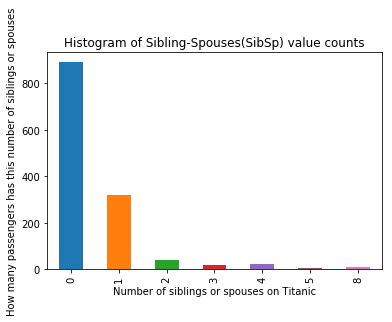

In [7]:
# Show count (histogram) of different SiblingSpouses (SibSp) values - from 0 to 5
# Покажем гистограмму количества пассажиров с 0-5 братьями-сёстрами или супругами на корабле
sib_sps = df['SibSp'].value_counts()
print(sib_sps)

# need to sort the index (first column values) for more obvious data representation
# значения индекса не отсортированы, полезно это исправить
sib_sps.sort_index(ascending=True, inplace=True)
print(sib_sps)

# Add title and axis names
plt.title('Histogram of Sibling-Spouses(SibSp) value counts')
plt.xlabel('Number of siblings or spouses on Titanic')
plt.ylabel('How many passengers has this number of siblings or spouses')

sib_sps.plot(kind='bar')

### 2.2. Pie chart - круговая диаграмма

<img src="./pie.jpg" width="400">

Представляют данные в виде долей целого и обычно используются для сравнения групп. Рекомендуется отображать не более 7-10 категорий, чтобы не перегрузить диаграмму.

Построим распределение пассажиров по классам в виде круговой диаграммы.

<class 'pandas.core.series.Series'>
3    709
1    323
2    277
Name: Pclass, dtype: int64


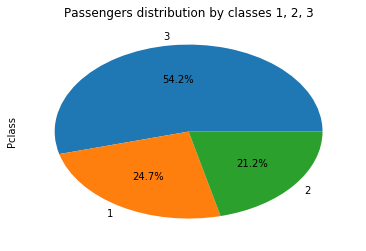

In [8]:
# Show passenger count by classes as a pie chart
# Покажем количество пассажиров в трёх классах на круговой диаграмме
passenger_classes = df['Pclass'].value_counts()
print(type(passenger_classes))
print(passenger_classes)

plt.title('Passengers distribution by classes 1, 2, 3')

# this uses matplotlib underneath
# эта визуализация основана на matplotlib, поэтому установка названия диаграммы выше сработала :)
# параметр autopct показывает, как представлять данные на секторах в процентах
passenger_classes.plot(kind='pie', autopct='%1.1f%%')

### Упражнение 1. Нарисовать круговую диаграмму пассажиров по порту посадки

In [28]:
# Exercise: draw pie chart for Embarked column

### 2.3. Scatter plot - точечный график

<img src="./scatter.jpg" width="400">

**Диаграмма рассеяния (также точечная диаграмма, англ. scatter plot)** — математическая диаграмма, изображающая значения двух переменных в виде точек на декартовой плоскости.

Хорошо иллюстрируют зависимость величин, помогают определить их корреляцию. Независимую переменную обычно отображают на горизонтальной оси, а зависимую - на вертикальной.

[Из Википедии](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D1%80%D0%B0%D1%81%D1%81%D0%B5%D1%8F%D0%BD%D0%B8%D1%8F)

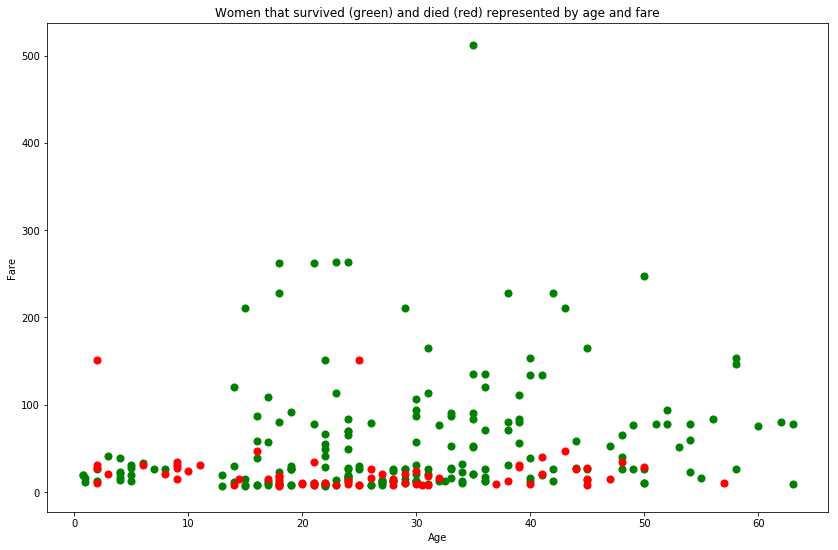

In [10]:
# increase plot size in the Jupyter window
# увеличим размер графика
plt.rcParams['figure.figsize'] = [14, 9]

# scatter plot of women by age ticket fare on red - died, green survived
# диаграмма рассеяния для женщин: по горизонтали - возраст, по вертикали цена билета, цвет точки - выжила или нет
df_female = df[df.Sex == 'female']

df_female_live = df_female[df_female.Survived == 1]
df_female_dead = df_female[df_female.Survived == 0]

plt.scatter(df_female_live.Age, df_female_live.Fare, s=50, c='g')
plt.scatter(df_female_dead.Age, df_female_dead.Fare, s=50, c='r')

# добавим название диаграммы и подписи осей
# Add title and axis names
plt.title('Women that survived (green) and died (red) represented by age and fare')
plt.xlabel('Age')
plt.ylabel('Fare')

plt.show()

### Упражнение 2. Нарисовать график выживших и погибших мужчин с осями: возраст, цена билета

In [11]:
# Exercise: draw scatter plot of survived and died men by Age and Fare

### 2.4. Ящик с усами (box plot)

**Ящик с усами (box plot, box-and-whisker plot)** - способ показать распределение значений по пяти ключевым точкам распределения: минимум или нижнияя граница, первая квартиль, медиана, третья квартиль и максимум или верхняя граница.

[Ящик с усами в Википедии](https://ru.wikipedia.org/wiki/%D0%AF%D1%89%D0%B8%D0%BA_%D1%81_%D1%83%D1%81%D0%B0%D0%BC%D0%B8).

**Медиана** - это такое число выборки, что ровно половина из элементов выборки больше него, а другая половина меньше него (если все элементы выборки различны). [Подробнее о медиане - в Википедии](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D0%B4%D0%B8%D0%B0%D0%BD%D0%B0_(%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0)).

**Квартили** дают важную информацию о структуре распределения признака. Вместе с медианой они делят вариационный ряд (или выборку) на 4 равные части. Квартилей две: верхняя и нижняя квартиль. 25% значений меньше, чем нижняя квартиль, 75% значений меньше, чем верхняя квартиль.

**Усы** ящика в простейшем случае - это наблюдения минимума и максимума (тогда выбросы не показаны на графике). Но концы усов могут определяться несколькими способами. Например, как разность первого квартиля и полутора межквартильных расстояний и сумма третьего квартиля и полутора межквартильных расстояний. Тогда всё, что не входит в усы графика, считается "выбросами" данной выброки.

Pandas+matplotlib по умолчанию показывают "усами" значения Q3 + 1.5\*IQR и Q1 - 1.5\*IQR то есть полтора интерквартильных размаха вверх от верхней квартили и вниз от нижней ([по документации] (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html)).

[Пример использования box plot для удаления выбросов](https://www.youtube.com/watch?v=qpihk7KepDI&t=124s) в значениях Fare и подсчёте пропущенных значений Fare по оставшемуся распределению без выбросов (на языке R).

[Understanding Boxplots](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51) статья на английском про коробочные диаграммы (ящики с усами).

Text(0,0.5,'Fare value')

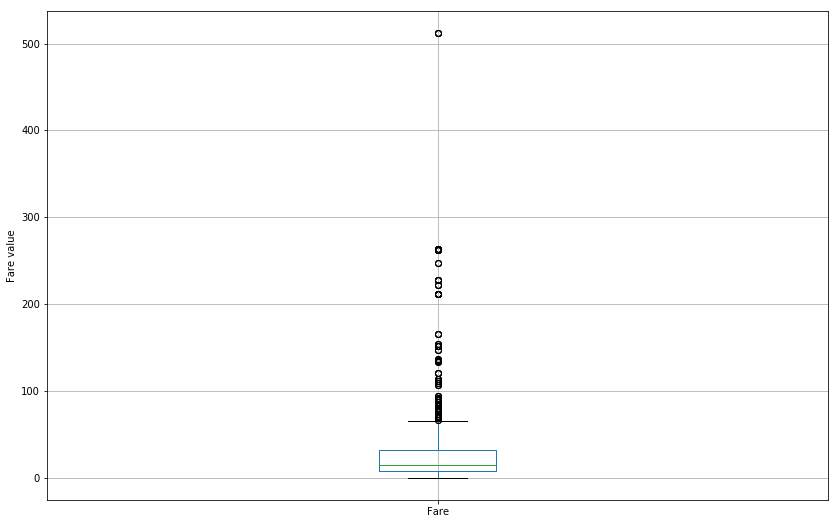

In [12]:
boxplot = df.boxplot(column=['Fare'])

plt.ylabel('Fare value')

В нашем случае значения Fare дают много выбросов над верхней границей графика.

## 3. Детальный анализ связи признаков и выживания
### 3.1. Связь пола и выживания

In [29]:
# выберем только колонки Sex (пол) и Survived (выживаемость), сохраним это в новый датафрейм
# select only dataframe part with Sex and Survived colums, save to new dataframe
df_sex = df_train.loc[:, ['Sex', 'Survived']]
df_sex.head()

Sex  Survived
PassengerId                  
1              male         0
2            female         1
3            female         1
4            female         1
5              male         0

In [14]:
# select only male part
# выберем только мужскую часть пассажиров
df_male = df_sex[df_sex.Sex == 'male']
df_male.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 1 to 891
Data columns (total 2 columns):
Sex         577 non-null object
Survived    577 non-null int64
dtypes: int64(1), object(1)
memory usage: 13.5+ KB


In [30]:
# select only female part
# выберем только женскую часть пассажиров
df_female = df_sex[df_sex.Sex == 'female']
df_female.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 2 to 889
Data columns (total 2 columns):
Sex         314 non-null object
Survived    314 non-null int64
dtypes: int64(1), object(1)
memory usage: 7.4+ KB


In [16]:
# Процент выживших мужчин - это среднее значение колонки Survived для них в датасете df_male
# percent of males survived - is a mean of Survived values in df_male
# Процент выживших женщин - это среднее значение колонки Survived для них в датасете df_female
# percent of females survived - is a mean of Survived values in df_female

male_survived_percent = df_male['Survived'].mean()
female_survived_percent = df_female['Survived'].mean()

print(male_survived_percent)
print(female_survived_percent)

print()

print("Percent of males survived is {0:.0f}%".format(male_survived_percent*100))
print("Percent of females survived is {0:.0f}%".format(female_survived_percent*100))

0.18890814558058924
0.7420382165605095

Percent of males survived is 19%
Percent of females survived is 74%


        Survived
Sex             
female  0.742038
male    0.188908


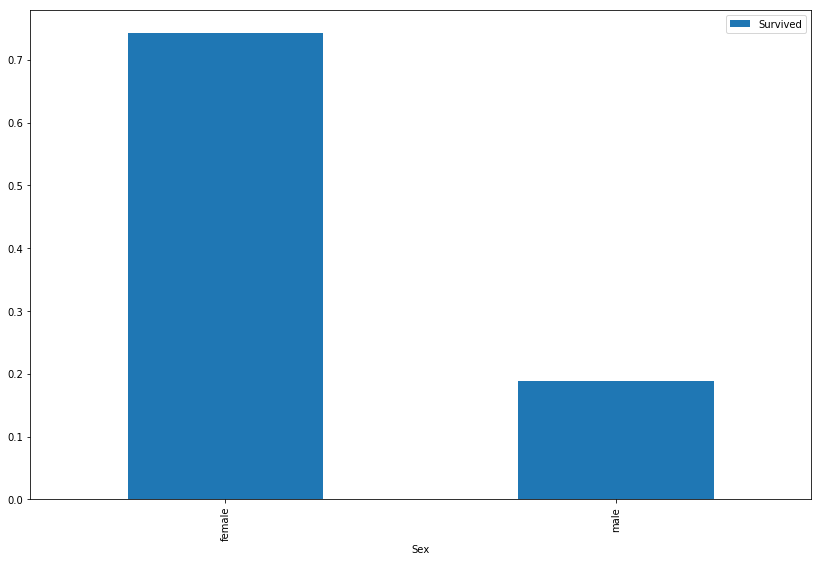

In [17]:
# короткий путь построения данных вероятности выживания по полу - pivot_table (сводная таблица) с агрегацией средним
# survived by sex - shorter way is creating a pivot table with pandas with its default mean aggregation
sex_pivot = df_train.pivot_table(index="Sex", values="Survived", aggfunc='mean')
print(sex_pivot)

sex_pivot.plot.bar()
plt.show()

### 3.2. Упражнение 3. Связь класса пассажира и выживания

In [18]:
# Exercise: calculate percent of survived in each Pclass and show on bar chart or other plot

In [31]:
# Check how people survived by their class and sex
print("survived by class and sex")
print(df_train.groupby(["Pclass", "Sex"])["Survived"].value_counts(normalize=True))

survived by class and sex
Pclass  Sex     Survived
1       female  1           0.968085
                0           0.031915
        male    0           0.631148
                1           0.368852
2       female  1           0.921053
                0           0.078947
        male    0           0.842593
                1           0.157407
3       female  0           0.500000
                1           0.500000
        male    0           0.864553
                1           0.135447
Name: Survived, dtype: float64


In [20]:
# check how Cabin feature looks
# there are some strange cabin values like 2 or 3 cabins for one passenger, no idea ho to process them
# просмотр, как выглядит признак Cabin (каюта), для некоторых пассажиров указано несколько кают
df_train['Cabin'].value_counts().head()

B96 B98        4
C23 C25 C27    4
G6             4
E101           3
F2             3
Name: Cabin, dtype: int64

In [21]:
# check how Ticket feature looks
# also quite strange data without any clear form to process
# просмотр, как выглядит признак Ticket (билет)
df_train['Ticket'].value_counts().head(10)

CA. 2343        7
347082          7
1601            7
3101295         6
CA 2144         6
347088          6
382652          5
S.O.C. 14879    5
PC 17757        4
113781          4
Name: Ticket, dtype: int64

In [22]:
# Check survival by age groups by creating such groups
# Проверим выживаемость по возрастным группам, например по десяткам лет. Создадим такой новый признак.

# https://stackoverflow.com/questions/5584586/find-the-division-remainder-of-a-number
# In division a % b give modulo
# В делении a % b даёт остаток от деления
# a / b gives divisor as float
# a // b gives divisor as integer, which will serve as a group
def make_age_group(row):
    return row['Age'] // 10

df['AgeGrp'] = df.apply(make_age_group, axis=1)
df.head()

Survived  Pclass  \
PassengerId                     
1                 0.0       3   
2                 1.0       1   
3                 1.0       3   
4                 1.0       1   
5                 0.0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  AgeGrp  
PassengerId                                                                  
1                1      0         A/5 21171   7.2500   NaN        S     2.0  
2                1      0          PC 17599  71.2833   C85        C     3.0  
3                0      0  STON/O2. 3101282   7.9250   NaN        S     2.0  
4                1      0            113803  53.1000  C123        S     3.0  
5                0      0            373450   8.0500   NaN        S     3.0

In [23]:
# Check how each age group survives
# Проверим, какая выживаемость в каждой возрастной группе
print("survived by AgeGroup")
print(df.groupby(["AgeGrp"])["Survived"].value_counts(normalize=True))

survived by AgeGroup
AgeGrp  Survived
0.0     1.0         0.612903
        0.0         0.387097
1.0     0.0         0.598039
        1.0         0.401961
2.0     0.0         0.650000
        1.0         0.350000
3.0     0.0         0.562874
        1.0         0.437126
4.0     0.0         0.617978
        1.0         0.382022
5.0     0.0         0.583333
        1.0         0.416667
6.0     0.0         0.684211
        1.0         0.315789
7.0     0.0         1.000000
8.0     1.0         1.000000
Name: Survived, dtype: float64


2.0    344
3.0    232
1.0    143
4.0    135
0.0     82
5.0     70
6.0     32
7.0      7
8.0      1
Name: AgeGrp, dtype: int64


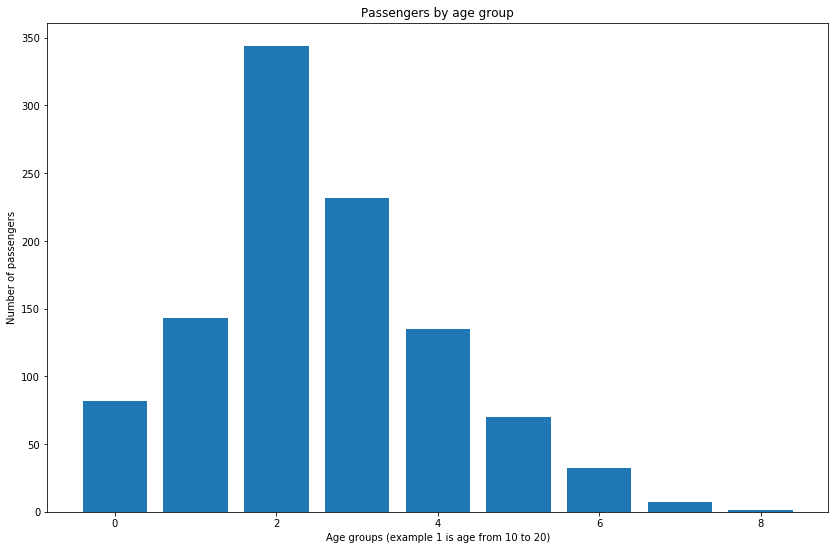

In [24]:
print(df['AgeGrp'].value_counts())

indexes = df['AgeGrp'].value_counts().index
values = df['AgeGrp'].value_counts().values

plt.bar(indexes, values)
 
# Add title and axis names
plt.title('Passengers by age group')
plt.xlabel('Age groups (example 1 is age from 10 to 20)')
plt.ylabel('Number of passengers')
 
plt.show()

### Упражнение 4 (на дом). Определить процент выживших в каждой группе возраста 

In [32]:
# Exercise: calculate percent of survived in each Age Group

## 4. Создание простейшей модели, вывод предсказания и посылка на Kaggle

Построим простую модель, напоминающую дерево решений, которая предсказывает, что женщины и дети из класса 1 и 2 выживут, мужчины из 3 точно погибнут, а дети любого пола до 10 лет выживут, только если у них 1 или более родителей на корабле.

### 4.1. Функция предсказания выживания

In [25]:
# this model has a bit higher score
def get_survival(df_row):
        is_female = df_row['Sex'] == 'female'
        pclass = df_row['Pclass']
        parent_child_count = df_row['Parch']
        siblings = df_row['SibSp']
        age_less_10 = df_row['AgeGrp'] == 0
        
        if (is_female):
            if (pclass != '3'):
                return 1
            elif (age_less_10 and parent_child_count > 0):
                return 1
            else:
                return 0
        else:
            if (pclass == '3'):
                return 0
            elif (age_less_10 and parent_child_count > 0):
                return 1
            else:
                return 0
            
# this model has lower score
# для сравнения также построим простейшую модель: выживают только женщины
def get_simple_female_survive(df_row):
       return int(df_row['Sex'] == 'female');

### 4.2. Создание файла с предсказанием

In [26]:
# Создаём новую колонку - предсказание выживаемости с помощью функции apply - применить функцию к датасету
df['survive_predict'] = df.apply(get_survival, axis=1)
print (df['survive_predict'].value_counts())

# Отделим только тестовую часть датастета для вывода - это наши ряды с 891 и ниже
# Create output dataset with only predicted rows from test dataset
df_out = df.iloc[891:, [12]]
print()
print(df_out.info())

# Rename our new prediction to Survived column
# переименуем предсказание в Survived, такое название требуется для отправки результата
df_out = df_out.rename(index=str, columns={"survive_predict": "Survived"})
print(df_out.head())

# write output to file
# запись ответа в файл
df_out.to_csv("evaluation_submission.csv") # got 0.77033 score and place 6079 on public leaderboard

# Полученный файл evaluation_submission.csv загружаем на Kaggle
# File evaluation_submission.csv should be uploaded to Kaggle competition page in "Submit Predictions" section

0    800
1    509
Name: survive_predict, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 1 columns):
survive_predict    418 non-null int64
dtypes: int64(1)
memory usage: 6.5 KB
None
             Survived
PassengerId          
892                 0
893                 1
894                 0
895                 0
896                 1


## 5. Домашнее задание и дополнительное чтение

### 5.1. Домашнее задание

Улучшить данную модель любым способом и получить оценку выше, чем текущая простая модель (больше 0.77033).

### 5.2. Дополнительное чтение

1. [«Айсберг вместо Оскара!» или как я пробовал освоить азы DataScience на kaggle](https://habr.com/ru/post/331992/) Полезно для начинающих и для понимания, как использовать Kaggle для учёбы.
2. [Kaggle и Titanic — еще одно решение задачи с помощью Python](https://habr.com/ru/post/274171/)
3. [Титаник на Kaggle: вы не дочитаете этот пост до конца](https://habr.com/ru/company/mlclass/blog/270973/) Глубокий анализ данных, код на языке R.
4. [Много обучающих статей на Kaggle - Tutorials on Titanic](https://www.kaggle.com/c/titanic#tutorials)
5. [Data Science with Python: Intro to Data Visualization with Matplotlib](https://towardsdatascience.com/data-science-with-python-intro-to-data-visualization-and-matplotlib-5f799b7c6d82)